In [1]:
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from astropy.io import fits
from astroquery.simbad import Simbad
from photutils import datasets
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'       # Melhora a resolucao do plot
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pylab as plt      # Permite fazer plots utilizando o pacote matplotlib
plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Determina o tamanho do plot dentro do ipython notebook

# download data example from datasets
hdu = datasets.load_star_image()

In [ ]:
# salvando o hdu em um arquivo .fits
hdu.writeto("arquivo_test.fits",overwrite=True)

In [2]:
# print o header a imagem
header = hdu.header
print (header,"")

(SIMPLE  =                    T /FITS header                                     
BITPIX  =                   16 /No.Bits per pixel                               
NAXIS   =                    2 /No.dimensions                                   
NAXIS1  =                 1059 /Length X axis                                   
NAXIS2  =                 1059 /Length Y axis                                   
DATE    = '03/03/08          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'E438              ' /Observatory plate label                         
PLATEID = '07HH              ' /GSSS Plate ID                                   
REGION  = 'XE486             ' /GSSS Region Name                                
DATE-OBS= '29/11/51          ' /UT date of Observation                          
UT      = '12:07:00.00       ' /UT time of observation                          
EPOCH   =  1.9519110107422E

<IPython.core.display.Javascript object>


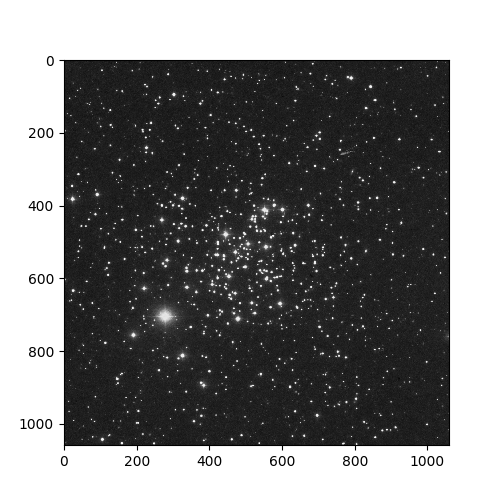

In [3]:
# visualiza a imagem 
%matplotlib notebook
image2 = hdu.data
plt.imshow(image2, cmap='gray')
plt.show()

<IPython.core.display.Javascript object>


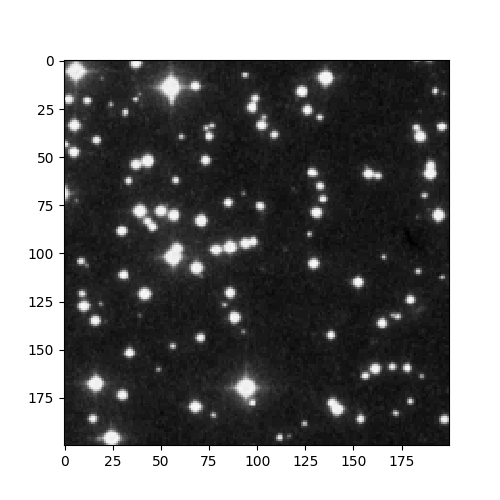

In [4]:
# visualiza parte da imagem selecionada
%matplotlib notebook
image = hdu.data[500:700, 500:700].astype(float) 
plt.imshow(image, cmap='gray')
plt.show()

In [7]:
# obtém as contagens do background, através do valor da mediana da imagem e
# posteriormente subtrai esse valor da própria imagem
image -= np.median(image)    

<IPython.core.display.Javascript object>


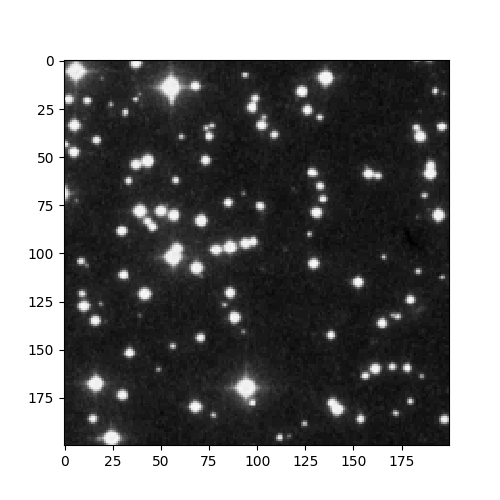

In [8]:
# verificando se foi subtraida o background da imagem
%matplotlib notebook 
plt.imshow(image, cmap='gray')
plt.show()

O Photutils suporta vários algoritmos de detecção de fontes. Para este exemplo, usamos DAOStarFinder para detectar as estrelas na imagem. Definimos o limiar de detecção no nível de ruído de 3 sigma, estimado usando o desvio absoluto mediano (mad_std) da imagem. Os parâmetros das fontes detectadas são retornados como uma tabela Astropy:

In [9]:
from photutils import DAOStarFinder
from astropy.stats import mad_std
bkg_sigma = mad_std(image)    
daofind = DAOStarFinder(fwhm=8., threshold=5.*bkg_sigma) 

# encontrando as fontes dentro da imagem
sources = daofind(image)    
print(sources)    

 id   xcentroid     ycentroid    ...  peak       flux           mag       
--- ------------- -------------- ... ------ ------------- ----------------
  1 183.428999757 0.198988771156 ...  920.0   1.407479877  -0.371105485946
  2 189.061880023 0.389929629334 ... 1646.0 2.36703886629  -0.935513472535
  3 37.0074265587  1.57202580576 ... 8829.0 11.7377260272   -2.67395992083
  4 5.74582591475   5.1641319204 ... 8750.0 6.70821485171   -2.06651740951
  5 135.404993085  8.80377648826 ... 8608.0 11.3687594598   -2.63928269444
  6 18.1011332169  7.32697141979 ... 1694.0 1.05853123574 -0.0617591948799
  7 55.0919878317  13.7146997858 ... 8296.0 5.51154232636   -1.85318286741
  8 67.3431613839  13.0207635485 ... 8750.0 10.1560021277   -2.51680695797
  9 192.532435293  15.4859450015 ... 7749.0 6.22182121032   -1.98479381777
 10 123.005476451  15.7591113906 ... 8812.0 13.1341551762   -2.79600535761
...           ...            ... ...    ...           ...              ...
 68 177.766048577  159.45

## Verificando as fontes extraidas da imagem

<IPython.core.display.Javascript object>


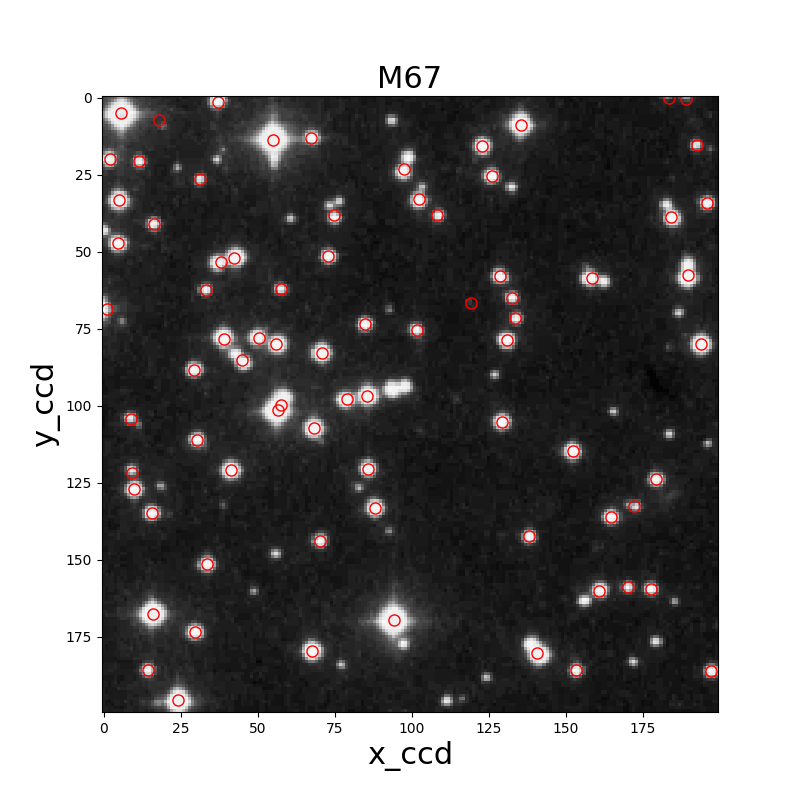

In [10]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)  # Determina o tamanho do plot dentro do ipython notebook
%matplotlib notebook
plt.imshow(image, cmap='gray')
for x1, y1 in zip(sources['xcentroid'],sources['ycentroid']):
    plt.plot(x1,y1, 'ro', markersize=8, fillstyle='none')
plt.title(header['OBJECT'],fontsize=22)
plt.xlabel('x_ccd',fontsize=22)
plt.ylabel('y_ccd',fontsize=22)
plt.show()

Usando a posição das fontes (xcentroid e ycentroid), calculamos a soma dos valores dos pixels em aberturas circulares com um raio de 4 pixels. A função **aperture_photometry()** retorna uma tabela Astropy com os resultados da fotometria:

In [11]:
from photutils import aperture_photometry, CircularAperture
positions = (sources['xcentroid'], sources['ycentroid'])    
apertures = CircularAperture(positions, r=4.)    
phot_table = aperture_photometry(image, apertures)    
print(phot_table) 

 id    xcenter       ycenter      aperture_sum
         pix           pix                    
--- ------------- -------------- -------------
  1 183.428999757 0.198988771156 19564.2085336
  2 189.061880023 0.389929629334 30037.5482482
  3 37.0074265587  1.57202580576 185328.656172
  4 5.74582591475   5.1641319204 413314.960948
  5 135.404993085  8.80377648826 364115.288526
  6 18.1011332169  7.32697141979 63103.8803878
  7 55.0919878317  13.7146997858 418853.447737
  8 67.3431613839  13.0207635485 206428.960295
  9 192.532435293  15.4859450015 80954.3706664
 10 123.005476451  15.7591113906  236990.79589
...           ...            ...           ...
 69 160.830147781  160.101836691 215044.178225
 70 15.9433673837  167.636523594 383875.142465
 71 94.3600328038  169.756341444 419019.680627
 72 29.6790390211  173.427309633 210665.522106
 73 67.7943829959  179.635361578 278218.884593
 74 140.788266627  180.239530471 353282.715598
 75 14.5262861842  185.879131048 143872.392732
 76 153.53799

A soma dos pixels dentro da abertura é dado na coluna aperture_sum. Abaixo está o plot da imagem com o valor da abertura escolhido.

<IPython.core.display.Javascript object>


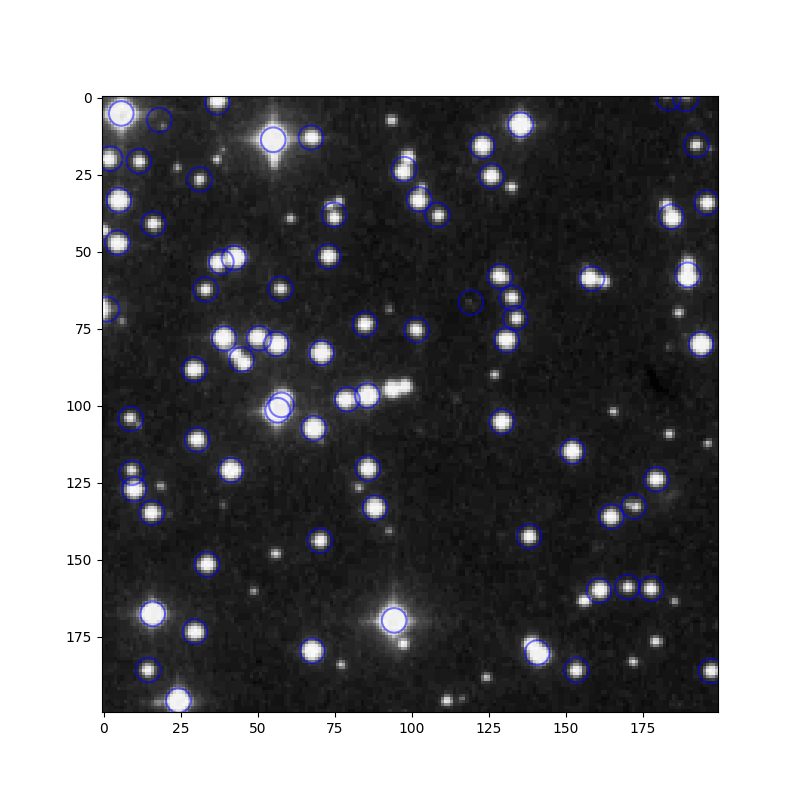

In [13]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)  # Determina o tamanho do plot dentro do ipython notebook
%matplotlib notebook
plt.imshow(image, cmap='gray')
apertures.plot(color='blue', lw=1.5, alpha=0.5)
plt.show()

### Multiple Apertures at Each Position

In [16]:
radii = [3., 4.,5.]
apertures = [CircularAperture(positions, r=r) for r in radii]
phot_table = aperture_photometry(image, apertures)
print(phot_table)

 id    xcenter       ycenter     aperture_sum_0 aperture_sum_1 aperture_sum_2
         pix           pix                                                   
--- ------------- -------------- -------------- -------------- --------------
  1 183.428999757 0.198988771156   16891.127224  19564.2085336   24365.718644
  2 189.061880023 0.389929629334  27224.5364219  30037.5482482  33113.2010829
  3 37.0074265587  1.57202580576  160277.307857  185328.656172  197243.632499
  4 5.74582591475   5.1641319204  237348.295603  413314.960948  588777.419589
  5 135.404993085  8.80377648826  237072.286057  364115.288526  441244.956501
  6 18.1011332169  7.32697141979  38336.4534652  63103.8803878  92099.9365622
  7 55.0919878317  13.7146997858  238305.582721  418853.447737  612142.887471
  8 67.3431613839  13.0207635485  162164.460608  206428.960295  245334.657201
  9 192.532435293  15.4859450015  74991.6887994  80954.3706664  86885.8096117
 10 123.005476451  15.7591113906  191445.094432   236990.79589  

## Circular annulus

In [17]:
from photutils import aperture_photometry, CircularAnnulus
positions = (sources['xcentroid'], sources['ycentroid'])    
apertures = CircularAnnulus(positions, r_in=0.01,r_out=4.)    
phot_table = aperture_photometry(image, apertures)    
print(phot_table) 

 id    xcenter       ycenter      aperture_sum
         pix           pix                    
--- ------------- -------------- -------------
  1 183.428999757 0.198988771156 19563.0071885
  2 189.061880023 0.389929629334 30036.0047837
  3 37.0074265587  1.57202580576  185325.88246
  4 5.74582591475   5.1641319204 413312.383271
  5 135.404993085  8.80377648826 364112.584243
  6 18.1011332169  7.32697141979 63103.5762816
  7 55.0919878317  13.7146997858 418850.784295
  8 67.3431613839  13.0207635485 206426.211402
  9 192.532435293  15.4859450015 80951.9362462
 10 123.005476451  15.7591113906 236988.027518
...           ...            ...           ...
 69 160.830147781  160.101836691 215041.448181
 70 15.9433673837  167.636523594 383872.484992
 71 94.3600328038  169.756341444 419017.040432
 72 29.6790390211  173.427309633 210662.759075
 73 67.7943829959  179.635361578  278216.10711
 74 140.788266627  180.239530471 353280.032677
 75 14.5262861842  185.879131048 143869.685308
 76 153.53799

## Centroids (photutils.centroids)

Photutils.centroids fornece várias funções para calcular o centróide de uma única fonte. Os métodos centroides são:

* Centroid_com (): calcula o objeto "centro de massa" a partir de momentos de imagem 2D.
* Centroid_1dg (): Calcule o centróide ajustando os Gaussianos 1D às distribuições marginais x e y dos dados.
* Centroid_2dg (): calcula o centróide, ajustando um Gaussian 2D para a distribuição 2D dos dados.

As máscaras podem ser inseridas em cada uma dessas funções para mascarar pixels ruins. Arrays de erros podem ser inseridos nos dois métodos de ajuste para pesar os ajustes.

<IPython.core.display.Javascript object>


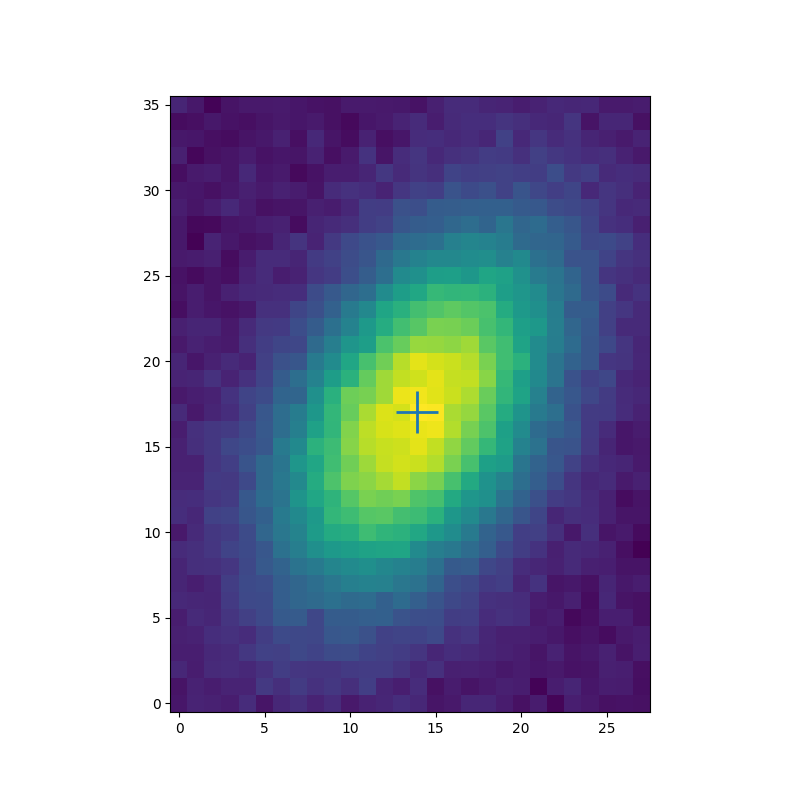

In [18]:
from photutils.datasets import make_4gaussians_image
from photutils import centroid_com, centroid_1dg, centroid_2dg
import matplotlib.pyplot as plt

data = make_4gaussians_image()[43:79, 76:104]    # extract single object
x1, y1 = centroid_com(data)
fig, ax = plt.subplots(1, 1)
ax.imshow(data, origin='lower', interpolation='nearest', cmap='viridis')
marker = '+'
ms, mew = 30, 2.
plt.plot(x1, y1, color='#1f77b4', marker=marker, ms=ms, mew=mew)
plt.show()

## exemplo teste de identificação de objetos na imagem

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 116.848093565  -31.824039308100001  
CRPIX : 513.0  513.0  
CD1_1 CD1_2  : -1.126286921e-05  0.000217278970801  
CD2_1 CD2_2  : -0.00021740115531000001  -1.0973129982600001e-05  
NAXIS : 1024  1024
####################################################################################################
1º método: Encontrando as fontes na imagem, identificando as fontes e plotando na imagem
####################################################################################################
As fontes identificadas na imagem foram
 id   xcentroid     ycentroid   ...      peak          flux           mag       
--- ------------- ------------- ... ------------- ------------- ----------------
  1 161.163923825 4.07738253323 ... 863.208251953 1.41357037258  -0.375793585234
  2 940.973280198 4.78501765152 ... 618.765197754 1.06571229916 -0.0690999447723
  3 164.398904484 10.2166451981 ... 1196.89001465 2.1860774688

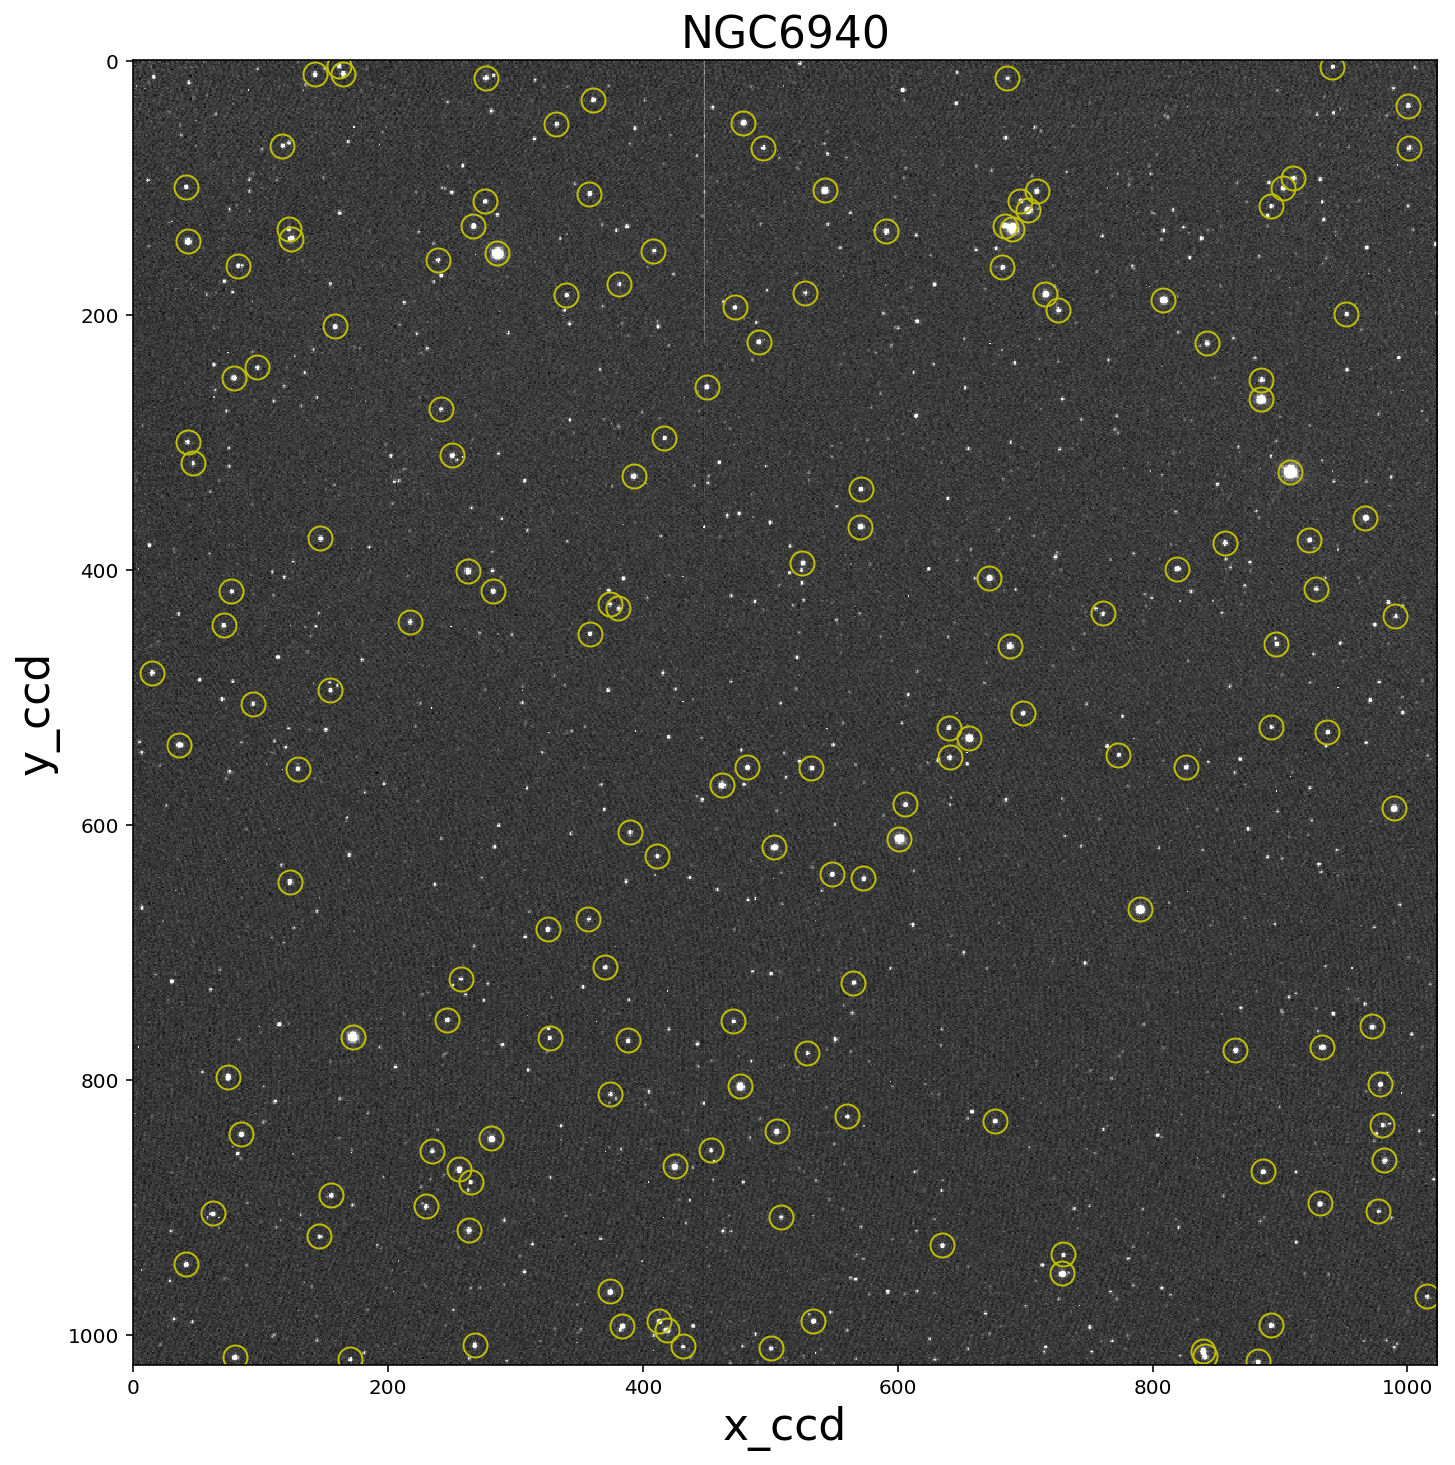

['CD-31  5070' 'CD-31  5076' 'HD  63339' 'TYC 7106-2184-1'
 'TYC 7106-2724-1' 'TYC 7110-1724-1' 'TYC 7110-3427-1']
Estrelas reconhecidas dentro do Simbad como sendo uma das fontes identificadas dentro da image
           ID           
------------------------
Gaia 5595134435725946752
              WRAY 15-87
               ALS   782
             CD-31  5070
             EM* AS  174
                Hen 3-78
         IRAS 07455-3143
                 LS  782
               [O92]  70
         TYC 7106-3410-1
         GSC 07106-03410
         UCAC2  18362948
 2MASS J07472929-3150403

####################################################################################################
2º método: Encontrando as coordenadas de algumas estrelas conhecidas no campo (identificadas via astrometry.net)
####################################################################################################
()
RA e DEC das estrelas conhecidas no campo (identificadas através do Astrometry.net)
[116.848, 11

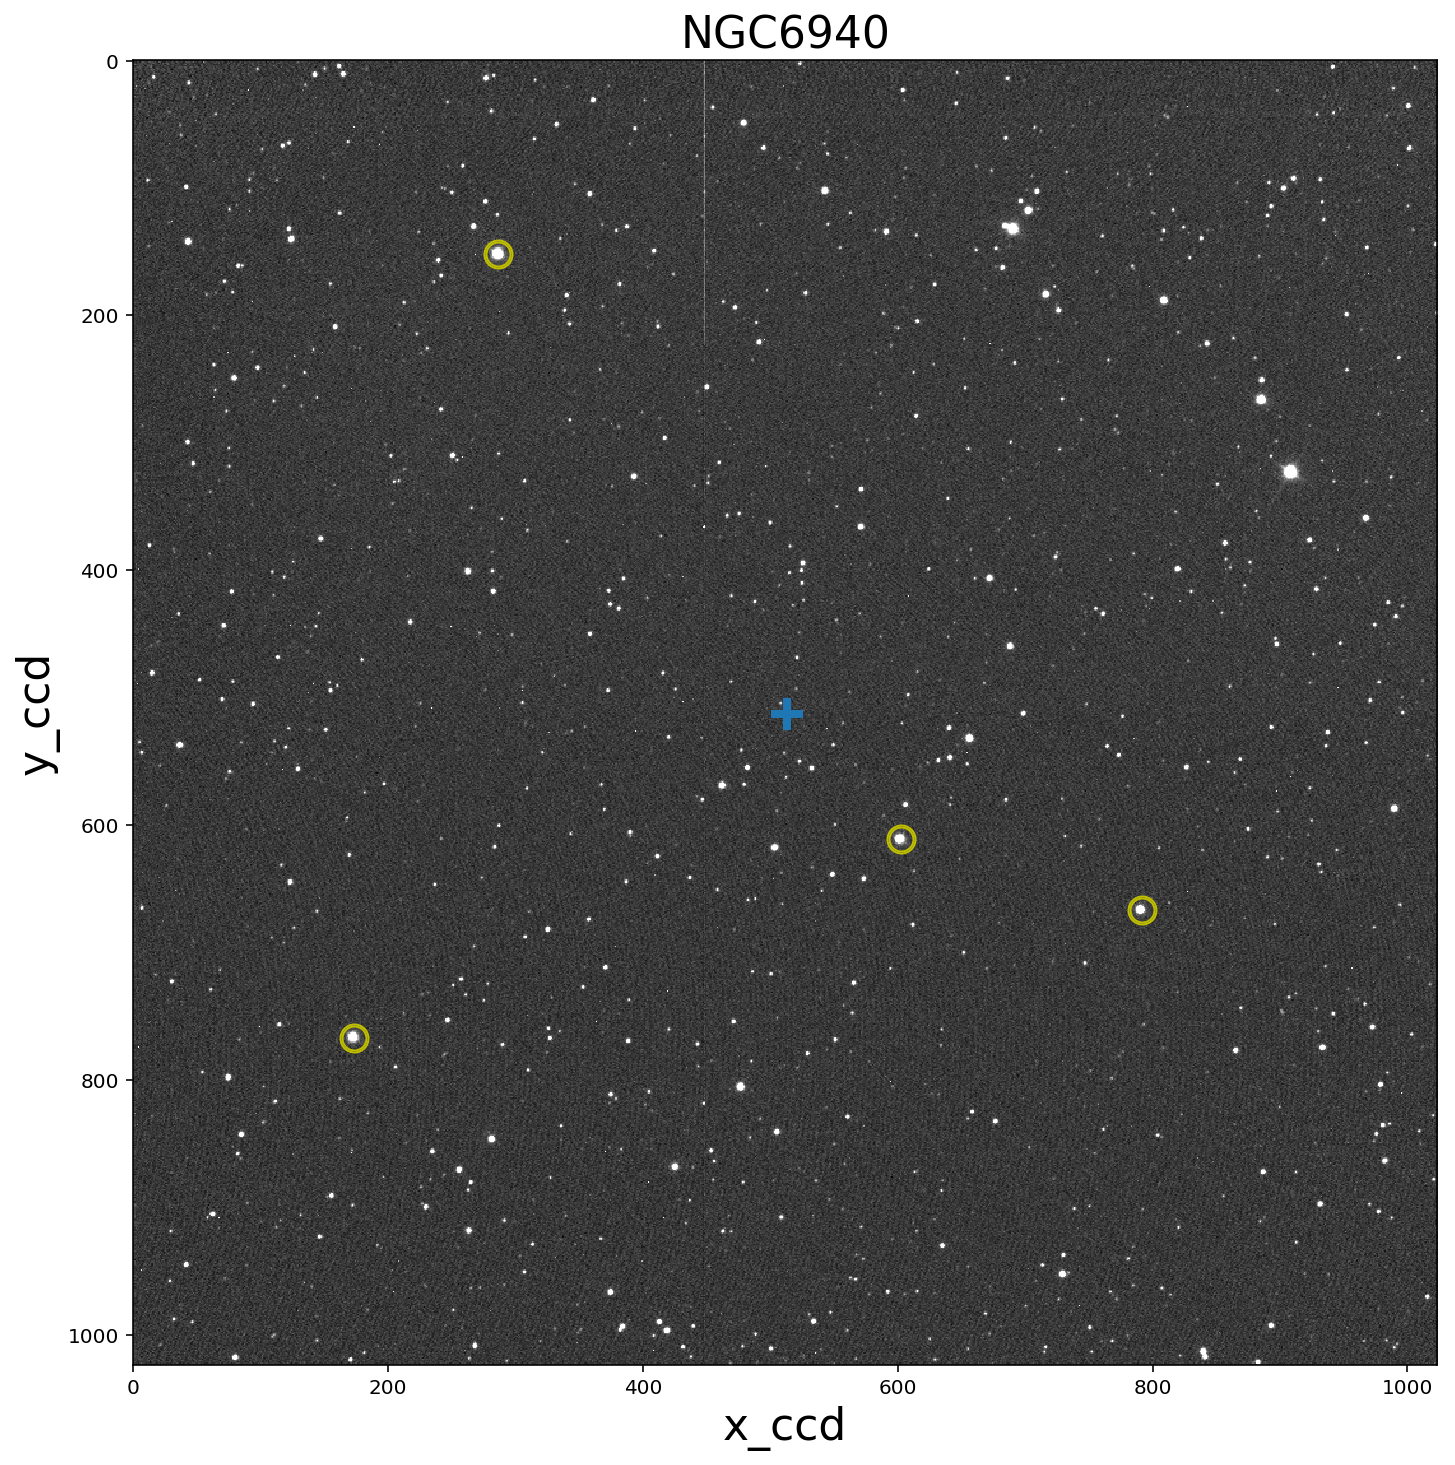


####################################################################################################
3º método. Buscando as estrelas do campo via Astroquery.Simbad(), tendo como referência
as coordenadas do centro da imagem e com raio equivalente ao da imagem ~ 0.11 deg
####################################################################################################

Estrelas identificadas na imagem pelo Simbad, tendo como referência as coordenadas do centro da imagem
e dentro de um raio de 0.11 graus
    MAIN_ID           RA      ... COO_WAVELENGTH     COO_BIBCODE    
                   "h:m:s"    ...                                   
--------------- ------------- ... -------------- -------------------
    CD-31  5070 07 47 29.2980 ...              O 2016A&A...595A...2G
TYC 7110-3427-1 07 47 32.0995 ...              O 2016A&A...595A...2G
TYC 7106-2724-1 07 46 59.5806 ...              O 2016A&A...595A...2G
    CD-31  5076 07 47 40.1822 ...              O 2016A&A...595A...2G
TYC 71

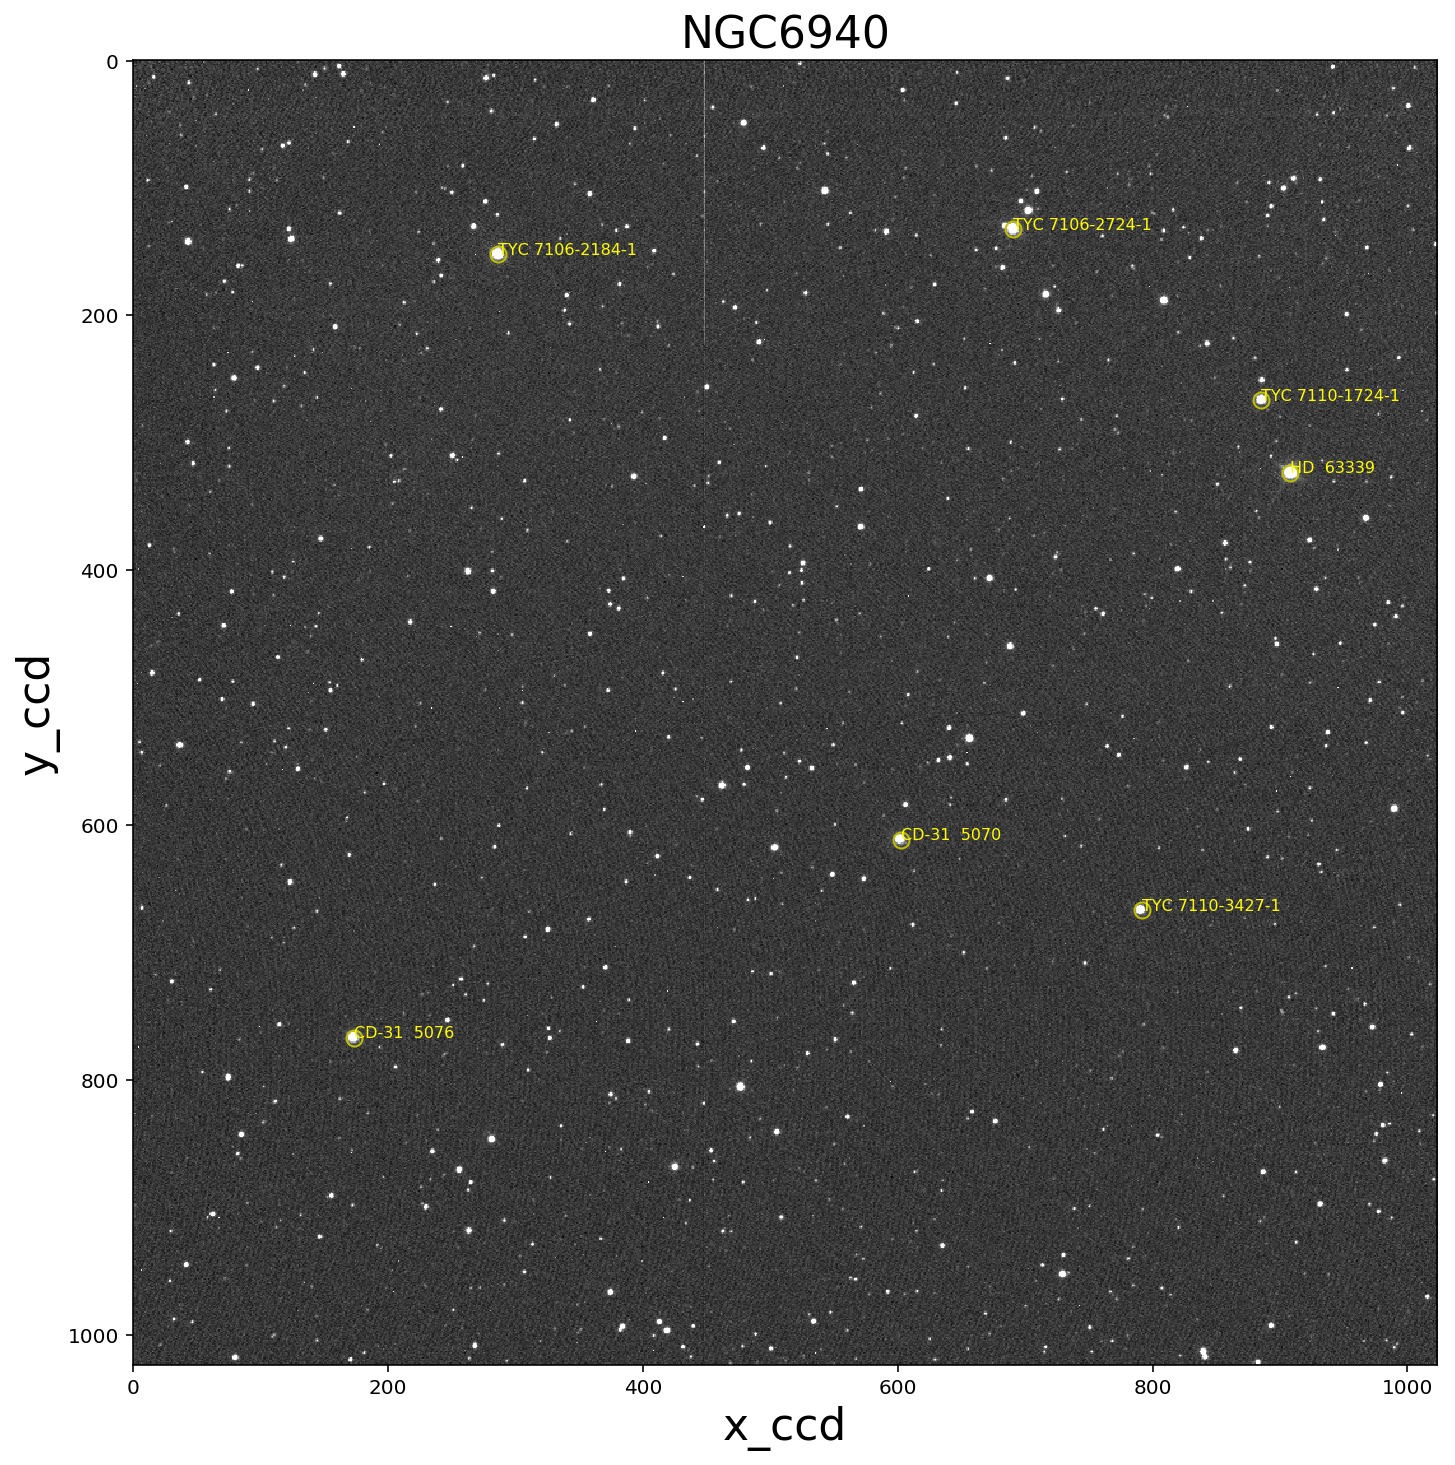

In [24]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina'       # Melhora a resolucao do plot
plt.rcParams['figure.figsize'] = (12.0, 12.0)      # Determina o tamanho do plot dentro do ipython notebook
import matplotlib.pylab as plt                     # Permite fazer plots utilizando o pacote matplotlib
from astropy.io import fits, votable               # Permite carregar arquivos fits e votable
from astropy.table import Table                    # Permite carregar tabelas
from astropy import wcs                            # Importa o pacote World Coordinate System
import numpy as np                                 # Importa o pacote numpy
from astropy.coordinates import SkyCoord   
import astropy.units as u
from astroquery.simbad import Simbad
import astropy.coordinates as coord

hdulist3  = fits.open('new-image.fits')    # abrindo o .fits com dados WCS no header
header3 = hdulist3[0].header               # armazena o header do arquivo new-image.fits na variável header3
image3 =  hdulist3[0].data                 # extrai a imagem do arquivo new-image.fits para a variável image3
w3 = wcs.WCS(header3)                      # extrai as informações necessárias para o wcs do Header da imagem
print(w3)
#print(header3,"")

#################################################################################################
print(100*"#")
print('1º método: Encontrando as fontes na imagem, identificando as fontes e plotando na imagem')
print(100*"#")

from photutils import DAOStarFinder
from astropy.stats import mad_std
bkg_sigma = mad_std(image3)    
daofind = DAOStarFinder(fwhm=4., threshold=55.*bkg_sigma) 
sources = daofind(image3)    

print("As fontes identificadas na imagem foram")
print(sources)

print
print("Plotando as fontes detectadas na imagem")
plt.imshow(image3, vmin=1, vmax=200, cmap='gray')         # plota a imagem 
for x, y in zip(sources['xcentroid'],sources['ycentroid']):  
    plt.plot(x,y, 'yo', markersize=12, fillstyle='none') # cria uma circunferência ao redor do objeto
plt.title('NGC6940',fontsize=22)                         # Dá o título da imagem
plt.xlabel('x_ccd',fontsize=22)                          # Dá o nome do eixo X do plot    
plt.ylabel('y_ccd',fontsize=22)                          # Dá o nome do eixo Y do plot
plt.show()                                               # Exibe a imagem
plt.close()

# Obtendo o ra e dec das fontes identificadas na fonte
ra_source =  []
dec_source = []
for x, y in zip(sources['xcentroid'],sources['ycentroid']):
    ra_fonte,dec_fonte = w3.all_pix2world(x,y,1)       # utiliza o ra e dec do catálogo e converte para pixels 
    ra_source.append(ra_fonte)
    dec_source.append(dec_fonte)
# print(ra_source[0]) ; print(dec_source[0])

# Busca por estrelas com as coordenadas ra e dec das fontes dentro de um raio com 0.5*u.arcmin
# e armazena os nomes das estrelas encontradas na lista "stars"
stars = []
for ra, dec in zip(ra_source,dec_source):
    verify = Simbad.query_region(coord.SkyCoord(ra,dec,unit=(u.deg, u.deg)),radius=0.5*u.arcmin)
    if verify == None:
        continue
    else:
        stars.append(verify['MAIN_ID'][0])
stars = np.unique(stars)
print(stars)
print("Estrelas reconhecidas dentro do Simbad como sendo uma das fontes identificadas dentro da image")

# Buscando outros nomes identificados pelo Simbad para as estrelas identificadas no campo
other_name_of_stars = []
for e in stars:
    other_name_of_stars.append(Simbad.query_objectids(e))

print(other_name_of_stars[0])

###################################################################################################
'''
# Obtendo as coordenadas do centro da imagem
ra_center = header3['OBJCTRA']
ra_center = ra_center.replace(" ",":")
dec_center = header3['OBJCTDEC']
dec_center = dec_center.replace(" ",":")

coords = [str(ra_center)+' '+str(dec_center)]
center = SkyCoord(coords, unit=(u.hour,u.degree))
print(center)
#( 116.87083333, -31.84444444)  # as coordenadas do centro da imagem não está correta.
'''
###################################################################################################
print ; print(100*"#")
print('2º método: Encontrando as coordenadas de algumas estrelas conhecidas no campo (identificadas via astrometry.net)')
print(100*"#")

name_stars = ['TYC 7106-3410-1','TYC 7110-3427-1','TYC 7106-3424-1','TYC 7106-2184-1']

ra_stars =  [116.848]  # RA  do centro da imagem segundo arquivo wcs (valor está no header do arquivo)
dec_stars = [-31.8240] # DEC do centro de imagem segundo arquivo wcs (valor está no header do arquivo)

# obtendo as coordenadas das estrelas dentro da lista "name_stars" usando Skycoord
for e in name_stars:
    coords = SkyCoord.from_name(e)
    ra_stars.append(coords.ra.degree)
    dec_stars.append(coords.dec.degree)

print()
print("RA e DEC das estrelas conhecidas no campo (identificadas através do Astrometry.net)")
print(ra_stars)
print(dec_stars)
###################################################################################################
print
print("Plotando as estrelas e o centro do CCD na imagem")
# plotando as estrelas e o centro do CCD na imagem.
cont = 0
plt.imshow(image3, vmin=1, vmax=200, cmap='gray')         # plota a imagem 
for ra, dec in zip(ra_stars,dec_stars):                   # extrai o ra e dec da tabela.
    x,y = w3.all_world2pix(ra, dec, 1)                    # utiliza o ra e dec do catálogo e converte para pixels 
    print(x,y)
    if cont == 0:
        marker = '+'
        ms, mew = 15, 4.
        plt.plot(x,y, markersize=16, marker=marker, ms=ms, mew=mew) # cria uma circunferência ao redor do objeto
    else:
        plt.plot(x,y, 'yo', markersize=12, fillstyle='none') # cria uma circunferência ao redor do objeto
        plt.plot(x,y, 'yo', markersize=14, fillstyle='none') # cria uma circunferência ao redor do objeto
    cont += 1
plt.title('NGC6940',fontsize=22)                         # Dá o título da imagem
plt.xlabel('x_ccd',fontsize=22)                          # Dá o nome do eixo X do plot    
plt.ylabel('y_ccd',fontsize=22)                          # Dá o nome do eixo Y do plot
plt.show()                                               # Exibe a imagem
plt.close()

###########################################################################################
print ; print(100*"#")
print('3º método. Buscando as estrelas do campo via Astroquery.Simbad(), tendo como referência')
print('as coordenadas do centro da imagem e com raio equivalente ao da imagem ~ 0.11 deg')
print(100*"#")
   

result_table = Simbad.query_region(coord.SkyCoord(116.848,-31.8240,unit=(u.deg, u.deg)),radius=0.11*u.deg)
print ; print("Estrelas identificadas na imagem pelo Simbad, tendo como referência as coordenadas do centro da imagem")
print("e dentro de um raio de 0.11 graus")
print(result_table)

name_obj = result_table['MAIN_ID']
ra_obj = result_table['RA']
dec_obj = result_table['DEC']

ra_fim = []
dec_fim = []
name_obj_fim = []
for e,i,z  in zip(ra_obj,dec_obj,name_obj):
    name_obj_fim.append(z)
    e.replace(" ",":")
    i.replace(" ",":")
    coords = [e+' '+i]
    center2 = SkyCoord(coords, unit=(u.hour,u.degree))
    ra_fim.append(center2.ra.deg[0])
    dec_fim.append(center2.dec.deg[0])
    
print ; print("RA e DEC das estrelas encontradas")
print ra_fim ; print dec_fim

print
print("Plotando as estrelas sobre a imagem, incluindo a anotação com o nome de cada estrela")
# plotando as estrelas na imagem.
plt.figure()
plt.imshow(image3, vmin=1, vmax=200, cmap='gray')     # plota a imagem 
for ra, dec,name in zip(ra_fim,dec_fim,name_obj_fim): # extrai o ra e dec da tabela.
    x,y = w3.all_world2pix(ra, dec, 1)                # utiliza o ra e dec do catálogo e converte para pixels 
    print(x,y)
    plt.plot(x,y, 'yo', markersize=8, fillstyle='none') # cria uma circunferência ao redor do objeto
    plt.annotate('%s'%(name), xy=(x,y),color='yellow',fontsize=8)
plt.title('NGC6940',fontsize=22)                         # Dá o título da imagem
plt.xlabel('x_ccd',fontsize=22)                          # Dá o nome do eixo X do plot    
plt.ylabel('y_ccd',fontsize=22)                          # Dá o nome do eixo Y do plot
plt.show()                                               # Exibe a imagem
plt.close()